In [1]:
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns

In [2]:
resultdir = "/data/mtmoore/school/CSiML_AI395T/final_project/models/yolo11/iterative"
trainre = re.compile(r'^.+\/iterative\/(?P<modelname>[^_]+)_(?P<imgsz>[\d]+)imgsz_(?P<camera>[^_]+)_(?P<epochs>[\d]+)epochs$')

model_parent = "yolov"
train_df = pd.DataFrame()

for trainresult in glob.glob(f"{resultdir}/*epochs"):
    match = trainre.match(trainresult)
    if match is None:
        print(F"didn't match directory name {trainresult}")
        continue
    params = match.groupdict()
    new_result = params.copy()
    new_result['modelname'] = f"{model_parent}{new_result['modelname']}"

    if not os.path.exists(f"{trainresult}/results.csv"):
        print(f"{valresult}/metrics.json doesn't exist right now, skipping")
        continue
    
    df = pd.read_csv(f"{trainresult}/results.csv")
    df['imgsz'] = new_result['imgsz']
    df['max_epochs'] = new_result['epochs']
    df['camera'] = new_result['camera']
    df['modelname'] = new_result['modelname']
    df = df.astype({'epoch':'int', 
                    'time': 'float', 
                    'train/box_loss': 'float', 
                    'train/cls_loss': 'float',
                    'train/dfl_loss': 'float',
                    'metrics/recall(B)': 'float',
                    'metrics/mAP50-95(B)': 'float',
                    'val/box_loss': 'float',
                    'val/cls_loss': 'float',
                    'val/dfl_loss': 'float',
                    'lr/pg0': 'float',
                    'lr/pg1': 'float',
                    'lr/pg2': 'float',
                    'imgsz': int,
                    'max_epochs': int,
                   })
    df.dropna(subset=['train/box_loss', 'train/cls_loss', 'train/dfl_loss'], inplace=True)
    train_df = pd.concat([train_df, df])

In [3]:
#pd.set_option('display.max_rows', None)
pd.reset_option('^display.', silent=True)

train_df.rename(columns={'imgsz': "Image Size (px)", 'epoch': 'Epoch',
#                       'precision': 'Precision', 'recall': 'Recall',
                         'camera': 'Camera', 'modelname': 'Model Name',
                         'train/box_loss': 'Box', 
                         'train/cls_loss': 'Classification',
                         'train/dfl_loss': 'Distribution Focal'},
                         inplace=True)
train_df.dtypes
display(train_df)

#mask_list = []
#mask_list.append(train_df['Camera'] == "IP8M-H-SW") 
#mask_list.append(train_df['Model Name'] == "yolov11m") 
#for s in [ 3840, ]:
#    mask_list.append(train_df['Image Size (px)'] == s) 
#    #display(train_df[ join_mask(mask_list) ])
#    #print(f"{s}: {len( train_df[ join_mask(mask_list) ] )}" )
#    mask_list.pop()



plot_metrics = ['Box', 'Classification','Distribution Focal' ]

def join_mask( mask_list ):
    full_mask = None
    for m in mask_list:
        if full_mask is None:
            full_mask = m
        else:
            full_mask = full_mask & m
    return full_mask

,Epoch,time,Box,Classification,Distribution Focal,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,Image Size (px),max_epochs,Camera,Model Name
0,1,15.2301,3.80080,240.47400,1.27950,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.000653,0.000653,0.000653,1440,150,IP8M-H-SW,yolov11s
1,2,29.7895,3.30282,11.07160,1.08204,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.001311,0.001311,0.001311,1440,150,IP8M-H-SW,yolov11s
2,3,44.2606,3.44357,4.87196,1.12843,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.001960,0.001960,0.001960,1440,150,IP8M-H-SW,yolov11s
3,4,58.6132,3.38652,3.50283,1.10771,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.001960,0.001960,0.001960,1440,150,IP8M-H-SW,yolov11s
4,5,72.8834,3.17959,2.42146,1.04687,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.001947,0.001947,0.001947,1440,150,IP8M-H-SW,yolov11s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6074.3200,1.15943,0.59926,0.87579,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.000086,0.000086,0.000086,2880,150,IP8M-H-SW,yolov11n
146,147,6116.0700,1.15773,0.60072,0.85752,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.000073,0.000073,0.000073,2880,150,IP8M-H-SW,yolov11n
147,148,6157.7900,1.15429,0.59726,0.87917,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.000060,0.000060,0.000060,2880,150,IP8M-H-SW,yolov11n
148,149,6199.5100,1.16777,0.60798,0.87263,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.000046,0.000046,0.000046,2880,150,IP8M-H-SW,yolov11n


# Plot training Loss

In [6]:
# iterate over cameras
mask_list = []
for camera in train_df['Camera'].unique().tolist():
    mask_list.append(train_df['Camera'] == camera) 
    
    # iterate over model
    for model in train_df[join_mask(mask_list)]['Model Name'].unique().tolist(): 
        mask_list.append((train_df['Model Name'] == model))

        current_df = train_df[ join_mask( mask_list ) ]
        
        #display(current_df)
        for metric in plot_metrics:
            #print(f"{camera}, {model}, {metric}")
            #fig = plt.figure()
            #axs = sns.lineplot(data=current_df, x='Epoch', y=metric, hue='Image Size (px)', palette='colorblind' )
            #axs.set_title(f"Training Loss {metric} for {model} (camera {camera})") 
            #if metric == "Classification":
            #    axs.set_ylim([0,10])
            #plt.show()
            #plt.close()
            pass
        mask_list.pop()
    mask_list.pop()

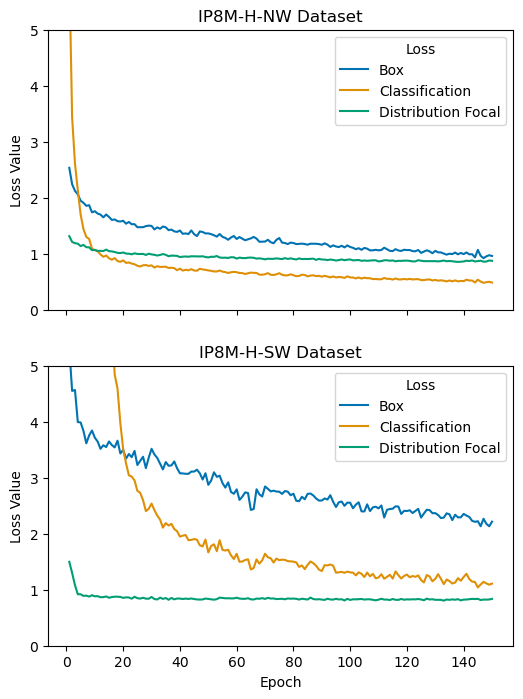

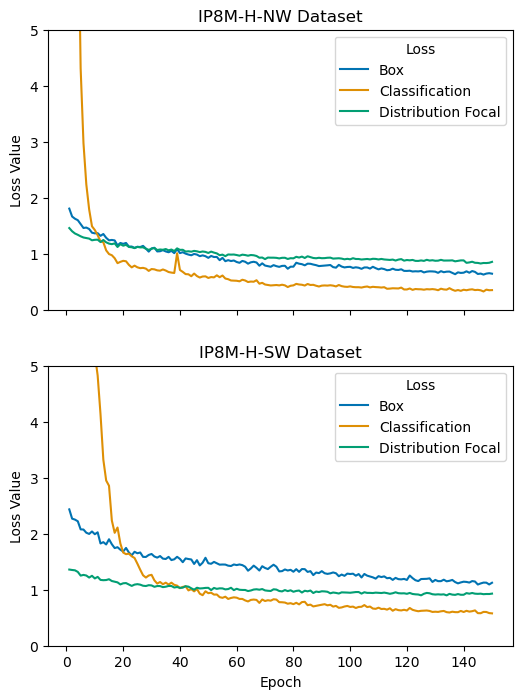

In [8]:
for model in ["yolov11n"]: #, "yolov11s", "yolov11m"]:
    for imgsize in [736, 3840]: #[736, 1440, 2880, 3840 ]:
        mask_list = []
        mask_list.append( train_df['Model Name'] == model )
        mask_list.append( train_df['Image Size (px)'] == imgsize )
        
        cameras = train_df[ join_mask(mask_list) ]['Camera'].unique().tolist()
        if len(cameras) == 1:
            continue
            
        fig, axs = plt.matplotlib.pyplot.subplots(nrows=len(cameras), ncols=1, sharex=True, sharey=False, figsize=(6,8))
        for i, camera in enumerate(cameras):
            mask_list.append((train_df['Camera'] == camera))
            current_df = train_df[ join_mask( mask_list ) ]
        
            melt_df = pd.melt(current_df, id_vars=['Epoch'], value_vars=plot_metrics, var_name='Loss', value_name='Loss Value')
            #display(melt_df)
            axs[i] = sns.lineplot(data=melt_df, x='Epoch', y='Loss Value', palette='colorblind', hue='Loss', ax=axs[i])
            axs[i].set_title(f"{camera} Dataset") 
        
            mask_list.pop()
            axs[i].set_ylim([0,5])
        
        #fig.suptitle(f"Training Loss Curves for {model.capitalize()} using {imgsize} pixel Images")
        plt.savefig(os.path.join("/data/mtmoore/school/CSiML_AI395T/final_project/plots", f"training_losses_camera_model_{imgsize}px_{model}.png"))
